In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
from time import sleep
from scipy.stats import linregress
from pprint import pprint
import csv
import scipy.stats as st

In [2]:
# Study data files
physical_activity_path = "../../data/Physical_activity.csv"
depression_path = "../../data/Adults_depression_S.csv"

In [3]:
# Read the data and store into Pandas DataFrame
physical_activity = pd.read_csv(physical_activity_path)

# Display the data table for preview
physical_activity.head()

,Year,LocationAbbr,Location,Question,Data_Value,Low_Confidence,High_Confidence,Sample_Size,Age(years),Gender,Race/Ethnicity
0,2020,US,National,Percent of adults who engage in no leisure-tim...,30.6,29.4,31.8,31255.0,NaN,NaN,Hispanic
1,2015,US,National,Percent of adults who achieve at least 300 min...,26.6,25.6,27.6,30904.0,NaN,NaN,NaN
2,2015,GU,Guam,Percent of adults who achieve at least 150 min...,27.4,18.6,38.5,125.0,NaN,NaN,Hispanic
3,2015,PR,Puerto Rico,Percent of adults who engage in no leisure-tim...,38.1,32.6,43.8,421.0,NaN,NaN,NaN
4,2015,GU,Guam,Percent of adults who engage in no leisure-tim...,30.5,25.8,35.6,559.0,NaN,NaN,NaN


In [4]:
# Read the data
depression = pd.read_csv(depression_path)

# Display the data table for preview
depression.head()

,Year,StateAbbr,State,Depression rate
0,2018,AL,Alabama,24.0
1,2018,AK,Alaska,20.2
2,2018,AZ,Arizona,16.7
3,2018,AR,Arkansas,22.5
4,2018,CA,California,15.4


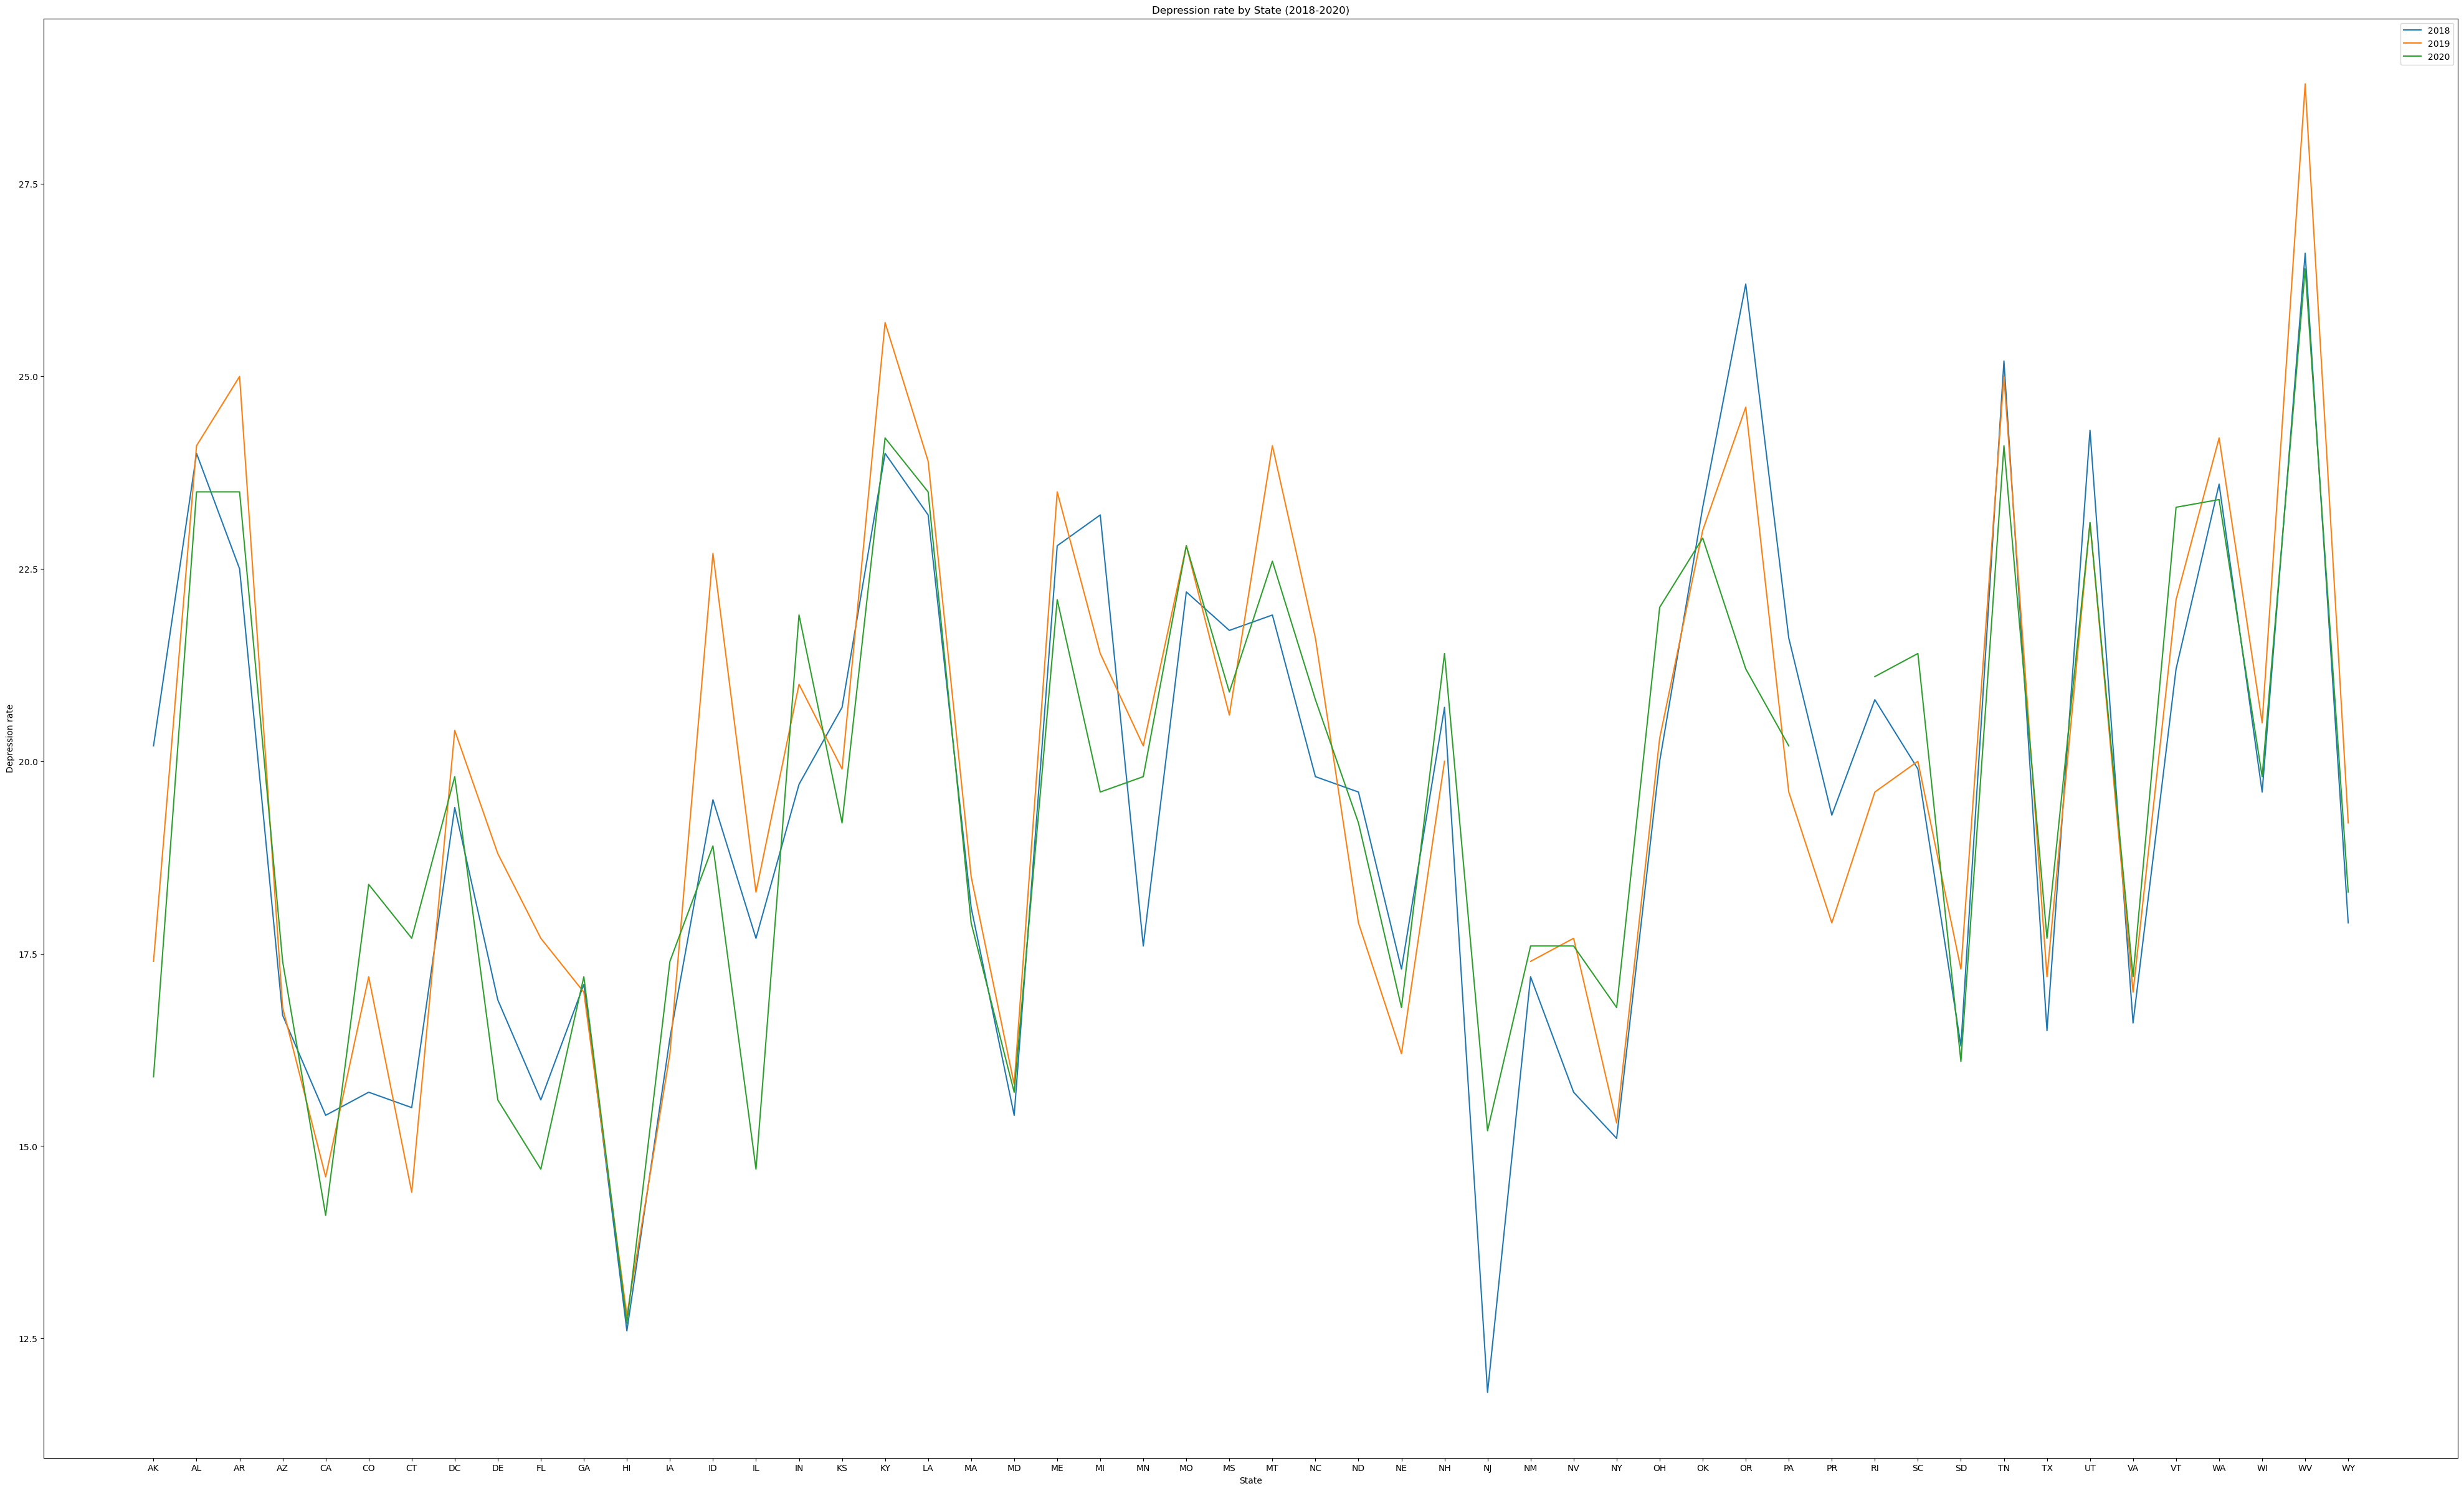

In [5]:
# Filter the data for years 2019, 2020, and 2021
years = [2018, 2019, 2020]
depression_years = depression[depression['Year'].isin(years)]

# Group the data by year and state, and calculate the mean rate
grouped = depression_years.groupby(['Year', 'StateAbbr']).mean().reset_index()

# Create a line graph with three lines for each year
plt.figure(figsize=(50,30))

for year in years:
    data = grouped[grouped['Year'] == year]
    plt.plot(data['StateAbbr'], data['Depression rate'], label=str(year))

plt.xlabel('State')
plt.ylabel('Depression rate')
plt.title('Depression rate by State (2018-2020)')
plt.legend()
plt.show()

In [6]:
depression_2020 = depression.loc[depression["Year"]==2020]
depression_2020 = depression_2020.dropna()
depression_2020

,Year,StateAbbr,State,Depression rate
104,2020,AL,Alabama,23.5
105,2020,AK,Alaska,15.9
106,2020,AZ,Arizona,17.4
107,2020,AR,Arkansas,23.5
108,2020,CA,California,14.1
109,2020,CO,Colorado,18.4
110,2020,CT,Connecticut,17.7
111,2020,DE,Delaware,15.6
112,2020,DC,District of Columbia,19.8
113,2020,FL,Florida,14.7


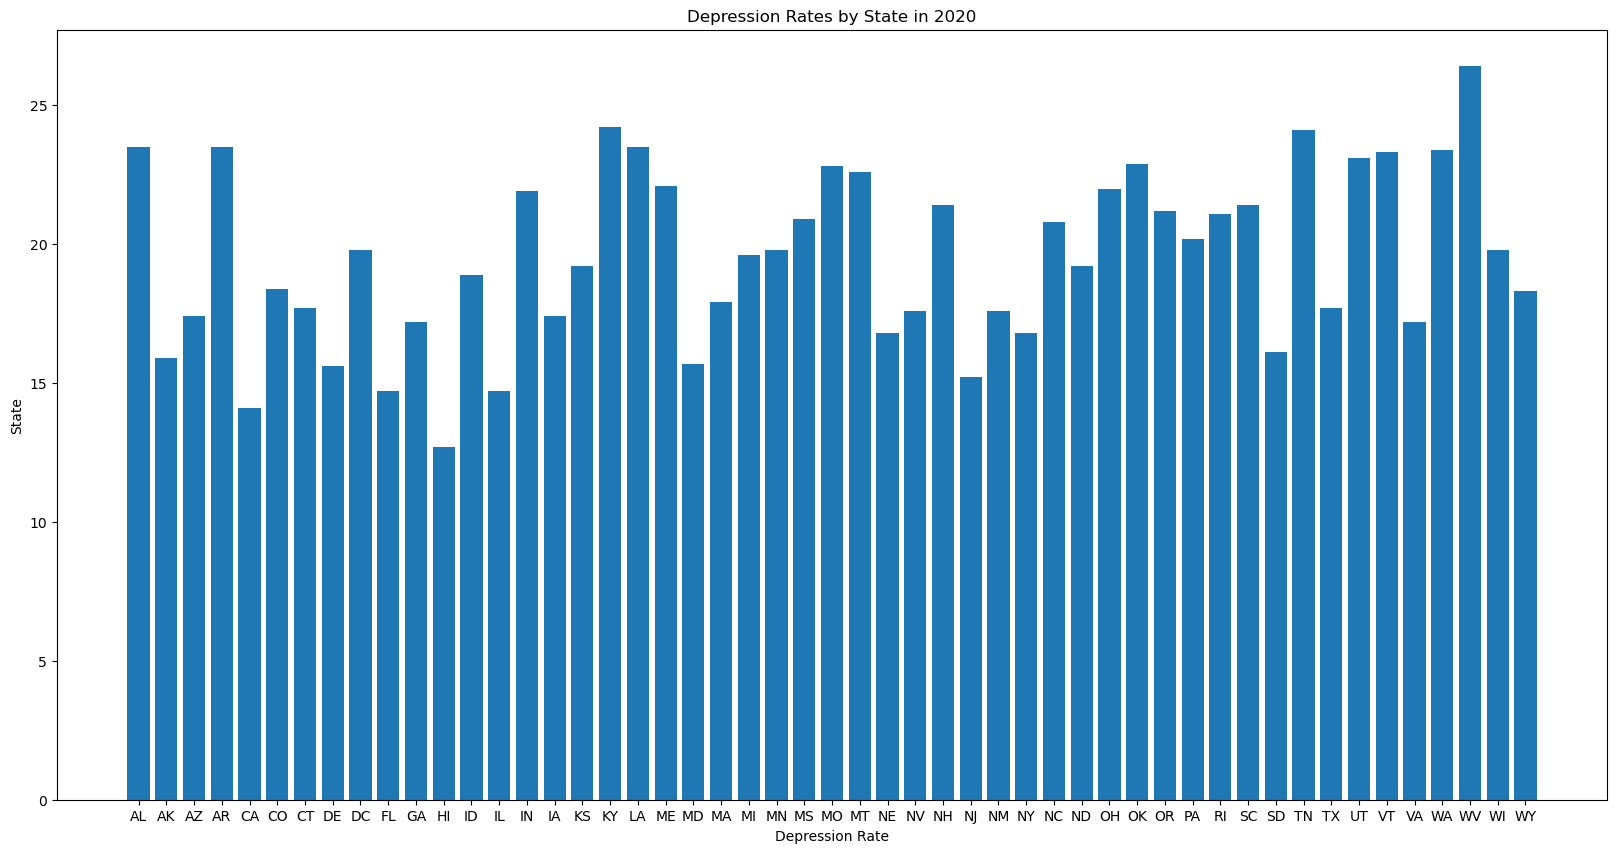

In [7]:

# Create a horizontal bar chart
fig, ax = plt.subplots(figsize=(20,10))
ax.bar(depression_2020['StateAbbr'], depression_2020['Depression rate'], align='center')

# Add axis labels and title
ax.set_xlabel('Depression Rate')
ax.set_ylabel('State')
ax.set_title('Depression Rates by State in 2020')
grid = True
# Show the plot
plt.show()


In [8]:
#find the states for the five highest depression rates in 2020
# depression_2020 = depression[depression['Year'] == 2020]
top_5_states_2020 = depression_2020.nlargest(5, 'Depression rate')
top_5_states_2020 


,Year,StateAbbr,State,Depression rate
153,2020,WV,West Virginia,26.4
121,2020,KY,Kentucky,24.2
147,2020,TN,Tennessee,24.1
104,2020,AL,Alabama,23.5
107,2020,AR,Arkansas,23.5


In [9]:
#find the states for the five lowest depression rates in 2020
bottom_5_states_2020 = depression_2020.nsmallest(5, 'Depression rate')
bottom_5_states_2020 

,Year,StateAbbr,State,Depression rate
115,2020,HI,Hawaii,12.7
108,2020,CA,California,14.1
113,2020,FL,Florida,14.7
117,2020,IL,Illinois,14.7
134,2020,NJ,New Jersey,15.2


In [10]:
#find the states with the higher depression rate over years 2018-2020
higher_depression_5_states = depression.nlargest(5, 'Depression rate')
higher_depression_5_states

,Year,StateAbbr,State,Depression rate
101,2019,WV,West Virginia,28.8
49,2018,WV,West Virginia,26.6
153,2020,WV,West Virginia,26.4
37,2018,OR,Oregon,26.2
69,2019,KY,Kentucky,25.7


In [11]:
#find the states with the lower depression rate over years 2018-2020
bottom_5_states = depression.nsmallest(5, 'Depression rate')
bottom_5_states 

,Year,StateAbbr,State,Depression rate
30,2018,NJ,New Jersey,11.8
11,2018,HI,Hawaii,12.6
115,2020,HI,Hawaii,12.7
63,2019,HI,Hawaii,12.8
108,2020,CA,California,14.1


In [12]:
physical_activity = physical_activity.rename(columns={'YearEnd':'Year', 'Location':'State'})

In [13]:
physical_activity_2020_df = physical_activity.loc[physical_activity['Year'] == 2020]
physical_activity_2020_df.head()

,Year,LocationAbbr,State,Question,Data_Value,Low_Confidence,High_Confidence,Sample_Size,Age(years),Gender,Race/Ethnicity
0,2020,US,National,Percent of adults who engage in no leisure-tim...,30.6,29.4,31.8,31255.0,NaN,NaN,Hispanic
6,2020,DE,Delaware,Percent of adults who engage in no leisure-tim...,15.3,6.9,30.6,65.0,NaN,NaN,Asian
13,2020,ME,Maine,Percent of adults who engage in no leisure-tim...,21.7,19.9,23.7,4518.0,NaN,Male,NaN
25,2020,MN,Minnesota,Percent of adults who engage in no leisure-tim...,28.5,25.8,31.4,1664.0,NaN,NaN,NaN
33,2020,SD,South Dakota,Percent of adults who engage in no leisure-tim...,22.6,19.5,26.1,3064.0,NaN,Male,NaN


In [14]:
depression_activity_df = pd.merge(depression_2020, physical_activity_2020_df, on=["Year","State"], how="outer")

depression_activity_df.head()

,Year,StateAbbr,State,Depression rate,LocationAbbr,Question,Data_Value,Low_Confidence,High_Confidence,Sample_Size,Age(years),Gender,Race/Ethnicity
0,2020,AL,Alabama,23.5,AL,Percent of adults who engage in no leisure-tim...,34.6,31.4,38.1,1346.0,NaN,NaN,Non-Hispanic Black
1,2020,AL,Alabama,23.5,AL,Percent of adults who engage in no leisure-tim...,22.5,18.6,26.9,576.0,25 - 34,NaN,NaN
2,2020,AL,Alabama,23.5,AL,Percent of adults who engage in no leisure-tim...,45.9,40.0,51.8,487.0,NaN,NaN,NaN
3,2020,AL,Alabama,23.5,AL,Percent of adults who engage in no leisure-tim...,24.2,14.1,38.5,79.0,NaN,NaN,2 or more races
4,2020,AL,Alabama,23.5,AL,Percent of adults who engage in no leisure-tim...,34.7,31.7,37.7,1528.0,NaN,NaN,NaN


In [15]:
depression_activity_2020_no_activity_df = depression_activity_df.loc[depression_activity_df['Question'] == "Percent of adults who engage in no leisure-time physical activity"]
depression_activity_2020_no_activity_df.head()

,Year,StateAbbr,State,Depression rate,LocationAbbr,Question,Data_Value,Low_Confidence,High_Confidence,Sample_Size,Age(years),Gender,Race/Ethnicity
0,2020,AL,Alabama,23.5,AL,Percent of adults who engage in no leisure-tim...,34.6,31.4,38.1,1346.0,NaN,NaN,Non-Hispanic Black
1,2020,AL,Alabama,23.5,AL,Percent of adults who engage in no leisure-tim...,22.5,18.6,26.9,576.0,25 - 34,NaN,NaN
2,2020,AL,Alabama,23.5,AL,Percent of adults who engage in no leisure-tim...,45.9,40.0,51.8,487.0,NaN,NaN,NaN
3,2020,AL,Alabama,23.5,AL,Percent of adults who engage in no leisure-tim...,24.2,14.1,38.5,79.0,NaN,NaN,2 or more races
4,2020,AL,Alabama,23.5,AL,Percent of adults who engage in no leisure-tim...,34.7,31.7,37.7,1528.0,NaN,NaN,NaN


In [16]:
Value_by_gender_2020 = depression_activity_2020_no_activity_df[["Data_Value","Sample_Size","Gender","State"]]
Value_by_gender_2020.head()

,Data_Value,Sample_Size,Gender,State
0,34.6,1346.0,NaN,Alabama
1,22.5,576.0,NaN,Alabama
2,45.9,487.0,NaN,Alabama
3,24.2,79.0,NaN,Alabama
4,34.7,1528.0,NaN,Alabama


In [17]:
Value_by_gender_2020 = Value_by_gender_2020.dropna().set_index("State")
Value_by_gender_2020

,Data_Value,Sample_Size,Gender
State,,,
Alabama,25.2,2171.0,Male
Alabama,32.1,3165.0,Female
Alaska,24.7,1851.0,Female
Alaska,18.2,1810.0,Male
Arizona,20.4,4755.0,Male
...,...,...,...
National,25.4,213555.0,Female
Puerto Rico,51.1,2963.0,Female
Puerto Rico,39.8,1978.0,Male


In [18]:
Value_by_gender_2020["no_physical_activity"] = Value_by_gender_2020["Data_Value"] * Value_by_gender_2020["Sample_Size"] / 100
Value_by_gender_2020

,Data_Value,Sample_Size,Gender,no_physical_activity
State,,,,
Alabama,25.2,2171.0,Male,547.092
Alabama,32.1,3165.0,Female,1015.965
Alaska,24.7,1851.0,Female,457.197
Alaska,18.2,1810.0,Male,329.420
Arizona,20.4,4755.0,Male,970.020
...,...,...,...,...
National,25.4,213555.0,Female,54242.970
Puerto Rico,51.1,2963.0,Female,1514.093
Puerto Rico,39.8,1978.0,Male,787.244


In [19]:
male_df = Value_by_gender_2020[Value_by_gender_2020['Gender'] == 'Male']
male_df = male_df.drop("National")
male_df.head()

,Data_Value,Sample_Size,Gender,no_physical_activity
State,,,,
Alabama,25.2,2171.0,Male,547.092
Alaska,18.2,1810.0,Male,329.420
Arizona,20.4,4755.0,Male,970.020
Arkansas,25.2,2182.0,Male,549.864
California,20.5,2337.0,Male,479.085


In [20]:
total_men_inactive = male_df['no_physical_activity'].sum()
total_men_inactive

38186.487

In [21]:
female_df = Value_by_gender_2020[Value_by_gender_2020['Gender'] == 'Female']
female_df = female_df.drop("National")
female_df.head()


,Data_Value,Sample_Size,Gender,no_physical_activity
State,,,,
Alabama,32.1,3165.0,Female,1015.965
Alaska,24.7,1851.0,Female,457.197
Arizona,24.3,5521.0,Female,1341.603
Arkansas,34.0,3049.0,Female,1036.660
California,21.9,2460.0,Female,538.740


In [22]:
total_women_inactive= female_df['no_physical_activity'].sum()
total_women_inactive

54310.77900000001

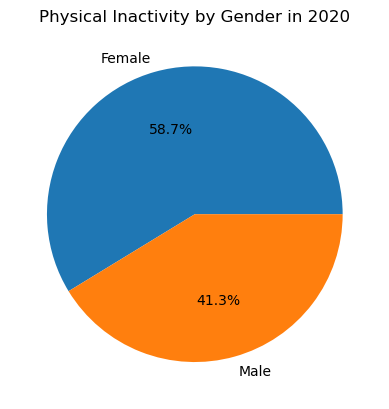

In [23]:
# Create the figure and axis
fig, ax = plt.subplots()

# Define the data labels and values
labels = ["Female", "Male"]
values = [total_women_inactive , total_men_inactive]

# Create the pie chart
ax.pie(values, labels=labels, autopct='%1.1f%%')

# Add a title
ax.set_title("Physical Inactivity by Gender in 2020")

# Show the chart
plt.show()

female_df = Value_by_gender_2020[Value_by_gender_2020['Gender'] == 'Female']
total_women = female_df['Sample_Size'].sum()
total_women

In [24]:
total_people_2020 = Value_by_gender_2020.groupby("State")["Sample_Size","no_physical_activity"].sum()
total_people_2020.head()

C:\Users\MishkisPCDell\AppData\Local\Temp\ipykernel_7396\3609015436.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  total_people_2020 = Value_by_gender_2020.groupby("State")["Sample_Size","no_physical_activity"].sum()


,Sample_Size,no_physical_activity
State,,
Alabama,5336.0,1563.057
Alaska,3661.0,786.617
Arizona,10276.0,2311.623
Arkansas,5231.0,1586.524
California,4797.0,1017.825


In [25]:
avg_no_physical_activity_2020 = total_people_2020["no_physical_activity"] / total_people_2020["Sample_Size"] * 100

total_people_2020["no physical activity rate"] = avg_no_physical_activity_2020

total_people_2020.head()


,Sample_Size,no_physical_activity,no physical activity rate
State,,,
Alabama,5336.0,1563.057,29.292672
Alaska,3661.0,786.617,21.486397
Arizona,10276.0,2311.623,22.495358
Arkansas,5231.0,1586.524,30.329268
California,4797.0,1017.825,21.217949


In [26]:
merged_depression_activity_2020_df = pd.merge(total_people_2020,depression_2020, on=["State"], how="outer")
merged_depression_activity_2020_df.head()

,State,Sample_Size,no_physical_activity,no physical activity rate,Year,StateAbbr,Depression rate
0,Alabama,5336.0,1563.057,29.292672,2020.0,AL,23.5
1,Alaska,3661.0,786.617,21.486397,2020.0,AK,15.9
2,Arizona,10276.0,2311.623,22.495358,2020.0,AZ,17.4
3,Arkansas,5231.0,1586.524,30.329268,2020.0,AR,23.5
4,California,4797.0,1017.825,21.217949,2020.0,CA,14.1


In [27]:
merged_depression_activity_2020_df = merged_depression_activity_2020_df.dropna()
merged_depression_activity_2020_df.head()


,State,Sample_Size,no_physical_activity,no physical activity rate,Year,StateAbbr,Depression rate
0,Alabama,5336.0,1563.057,29.292672,2020.0,AL,23.5
1,Alaska,3661.0,786.617,21.486397,2020.0,AK,15.9
2,Arizona,10276.0,2311.623,22.495358,2020.0,AZ,17.4
3,Arkansas,5231.0,1586.524,30.329268,2020.0,AR,23.5
4,California,4797.0,1017.825,21.217949,2020.0,CA,14.1


Text(0, 0.5, 'Depression rate')

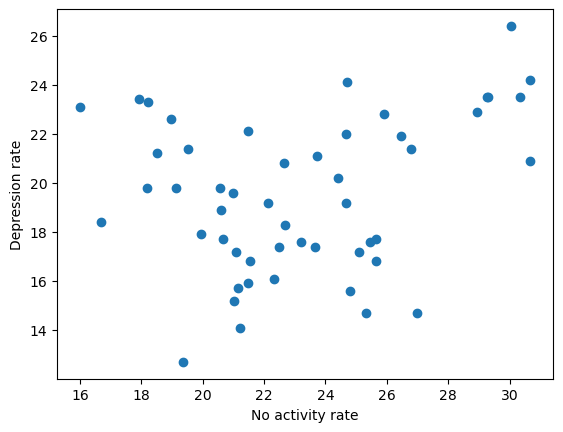

In [28]:
# Generate a scatter plot
depression_rate = merged_depression_activity_2020_df["Depression rate"]
no_activity_rate = merged_depression_activity_2020_df["no physical activity rate"]
plt.scatter(no_activity_rate, depression_rate)
plt.xlabel('No activity rate')
plt.ylabel('Depression rate')

The r-value is: 0.07183280554658625


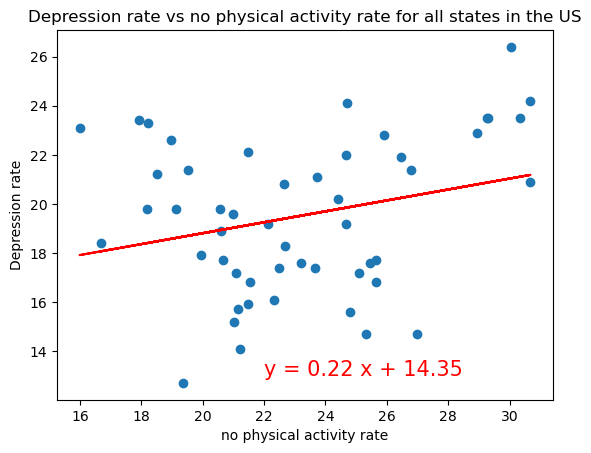

In [29]:
def linear_regression(df, x_col_name, y_col_name, coord):

    # Define a function to create Linear Regression plots
    x_values = df[x_col_name]
    y_values = df[y_col_name]

    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

    # Get regression values
    regress_values = x_values * slope + intercept

    line_eq = f"y = {round(slope, 2)} x + {round(intercept, 2)}"
    
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r-")

    # Label plot and annotate the line equation
    plt.xlabel(x_col_name)
    plt.ylabel(y_col_name)
    plt.title(f"{y_col_name} vs {x_col_name} for all states in the US")
    plt.annotate(line_eq, coord, fontsize=15,color="red")

    # Print r value
    print(f"The r-value is: {rvalue**2}")

    # Show plot
    plt.show()

# Linear regression 
# Perform a linear regression on suicide rate vs no activity rate
linear_regression(merged_depression_activity_2020_df , "no physical activity rate", "Depression rate", (22,13))
